In [11]:
#Импортируем необходимые модули
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [12]:
data = wb.DataReader('^GSPC', data_source='yahoo', start='2010-1-1') # Получаем данные с yahoo finance для одного тикера

Формула простой доходности
$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

Формула логарифмической доходности
$$
ln(\frac{P_t}{P_{t-1}})
$$

In [13]:
# Считаем простую доходность
data['simple_return'] = (data['Adj Close'] / data['Adj Close'].shift(1)) - 1
print (data['simple_return'])

Date
2010-01-04         NaN
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
                ...   
2020-07-07   -0.010819
2020-07-08    0.007827
2020-07-09   -0.005644
2020-07-10    0.010466
2020-07-13   -0.009363
Name: simple_return, Length: 2649, dtype: float64


In [14]:
#Второй способ считать простую доходность методом процентного изменения
day_returns = data['Adj Close'].pct_change()
day_returns

Date
2010-01-04         NaN
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
                ...   
2020-07-07   -0.010819
2020-07-08    0.007827
2020-07-09   -0.005644
2020-07-10    0.010466
2020-07-13   -0.009363
Name: Adj Close, Length: 2649, dtype: float64

In [15]:
# Считаем логарифмическую доходность
data['log_return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
print (data['log_return'])

Date
2010-01-04         NaN
2010-01-05    0.003111
2010-01-06    0.000545
2010-01-07    0.003993
2010-01-08    0.002878
                ...   
2020-07-07   -0.010877
2020-07-08    0.007797
2020-07-09   -0.005660
2020-07-10    0.010412
2020-07-13   -0.009407
Name: log_return, Length: 2649, dtype: float64


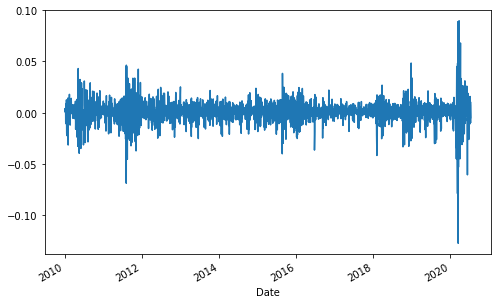

In [16]:
# Визуализируем дневную доходность
data['log_return'].plot(figsize=(8, 5))
plt.show()

In [17]:
# Считаем среднею дневную доходность
avg_returns_d = data['simple_return'].mean()
avg_returns_d

0.0004481118175728831

In [18]:
# Считаем годовую доходность
avg_returns_a = data['simple_return'].mean() * 250
avg_returns_a

0.11202795439322077

In [19]:
#Приводим к процентам доходность
print (str(round(avg_returns_a, 5) * 100) + ' %')

11.203000000000001 %


Считаем доходность портфеля

In [20]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

Нормализуем к 100

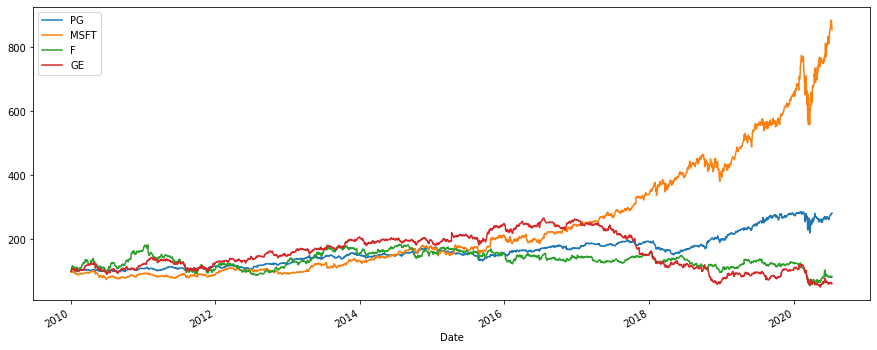

In [21]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [22]:
returns = (mydata / mydata.shift(1)) - 1 #Считаем доходность
returns.head()

,PG,MSFT,F,GE
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.000328,0.000323,0.066148,0.005178
2010-01-06,-0.004743,-0.006137,0.037409,-0.005151
2010-01-07,-0.005423,-0.010400,0.025506,0.051780
2010-01-08,-0.001322,0.006897,0.002573,0.021539


In [23]:
weights = np.array([0.25, 0.25, 0.25, 0.25]) # присваиваем веса

In [24]:
np.dot(returns, weights)

array([        nan,  0.01799404,  0.00534424, ..., -0.01955066,
        0.01742925, -0.00866496])

In [25]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.112540
MSFT    0.233979
F       0.031527
GE      0.002979
dtype: float64

In [26]:
pfolio = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio)

9.526 %


**Анализ индексов**

In [27]:
tickers = ['^DJI', '^GSPC', '^IXIC']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

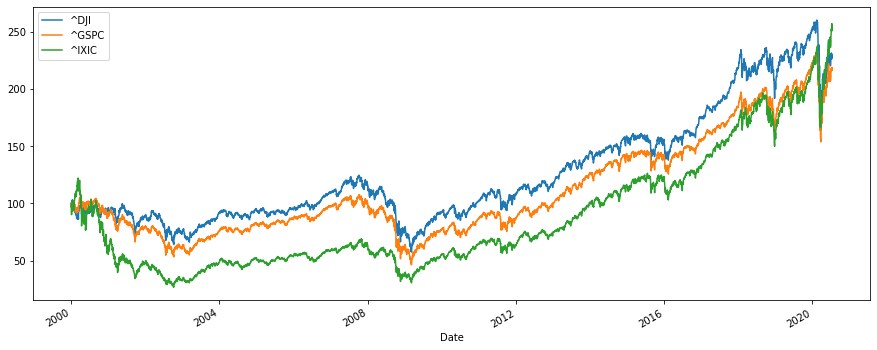

In [28]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6)); #нормализуем
plt.show()

In [29]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

In [30]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^DJI     0.058589
^GSPC    0.057277
^IXIC    0.076861
dtype: float64

### Считаем рискованность (волатильность) активов

In [31]:
tickers = ['SBER.ME', 'GMKN.ME', 'YNDX.ME']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [32]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [33]:
sec_returns[['SBER.ME', 'GMKN.ME', 'YNDX.ME']].mean() * 250 # Годовая доходность

SBER.ME    0.163357
GMKN.ME    0.252164
YNDX.ME    0.184018
dtype: float64

In [34]:
sec_returns[['SBER.ME', 'GMKN.ME', 'YNDX.ME']].std() * 250 ** 0.5 # Стандартное отклонение

SBER.ME    0.736387
GMKN.ME    0.315857
YNDX.ME    0.368036
dtype: float64

## Считаем ковариацию и корреляцию

In [35]:
cov_matrix = sec_returns.cov()
cov_matrix

,SBER.ME,GMKN.ME,YNDX.ME
SBER.ME,0.002169,0.000096,0.000137
GMKN.ME,0.000096,0.000399,0.000106
YNDX.ME,0.000137,0.000106,0.000542


In [36]:
corr_matrix = sec_returns.corr()
corr_matrix

,SBER.ME,GMKN.ME,YNDX.ME
SBER.ME,1.000000,0.103308,0.287430
GMKN.ME,0.103308,1.000000,0.238489
YNDX.ME,0.287430,0.238489,1.000000


### Считаем риски портфеля

In [37]:
weights = np.array([0.4, 0.4, 0.2])

In [38]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.1255504244254071

In [39]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.354330953242032

In [40]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

35.433 %


## Расчет системного и несистемного риска

In [41]:
SBER_var_a = sec_returns['SBER.ME'].var() * 250
SBER_var_a

0.5422650988324812

In [42]:
GMKN_var_a = sec_returns['GMKN.ME'].var() * 250
GMKN_var_a

0.09976595857826422

In [43]:
YNDX_var_a = sec_returns['YNDX.ME'].var() * 250
YNDX_var_a

0.13545024387632618

In [44]:
dr = pfolio_var - (weights[0] ** 2 * SBER_var_a) - (weights[1] ** 2 * GMKN_var_a) - (weights[2] ** 2 * YNDX_var_a)
dr

0.01740744548463476

In [45]:
print (str(round(dr*100, 3)) + ' %')

1.741 %


In [46]:
n_dr = pfolio_var - dr #Расчет несистемного риска
n_dr

0.10814297894077234

In [47]:
print (str(round(n_dr*100, 3)) + ' %') # Расчет несистемного риска

10.814 %
